In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 파일 경로
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

print("Setup Complete")

Setup Complete


In [207]:
# 데이터 불러오기
meta_filepath = "./hs_meta.csv"
meta_data = pd.read_csv(meta_filepath)

# 'Winrate' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Winrate'] = meta_data['Winrate'].str.rstrip('%').astype('float')

# 'Popular' 열에서 퍼센트 기호 제거하고 숫자로 변환
meta_data['Popular'] = meta_data['Popular'].str.rstrip('%').astype('float')

# 'Games' 열에서 쉼표 제거하고 숫자로 변환
meta_data['Games'] = meta_data['Games'].str.replace(',', '').astype('int')

# 데이터 헤드 출력
meta_data

,Hero,Deck,Winrate,Popular,Games
0,죽음의 기사,Plague Death Knight,55.5,6.9,80000
1,죽음의 기사,부정 죽음의 기사,39.5,3.5,40000
2,죽음의 기사,혈기 죽음의 기사,38.6,2.0,22000
3,죽음의 기사,냉기 죽음의 기사,47.5,1.0,11000
4,죽음의 기사,Rainbow Death Knight,48.1,0.7,7900
...,...,...,...,...,...
61,전사,격노 전사,58.7,1.0,11000
62,전사,도발 전사,45.9,0.6,6400
63,전사,하이랜더 전사,44.3,0.4,4200
64,전사,Rock 'n' Roll Warrior,48.8,0.3,3900


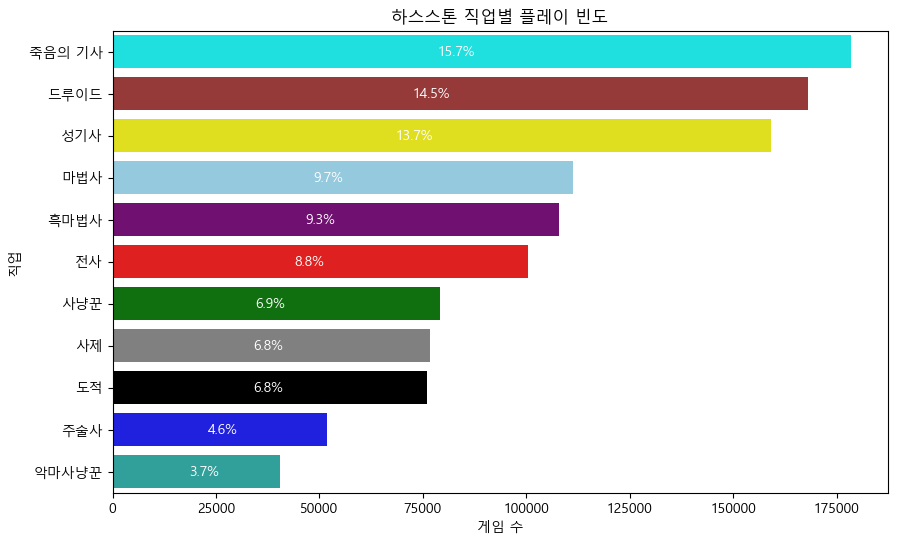

In [208]:
# 직업별 게임 플레이 빈도 계산
hero_total = meta_data.groupby(['Hero'])[['Popular','Games']].sum().reset_index()

# 게임 수가 많은 순으로 정렬
hero_total = hero_total.sort_values(by='Games', ascending=False)

# 직업별 색깔 지정
hero_color = {
    '죽음의기사': 'cyan',
    '드루이드': 'brown',
    '성기사': 'yellow',
    '마법사': 'skyblue',
    '흑마법사': 'purple',
    '전사': 'red',
    '사냥꾼': 'green',
    '사제': 'gray',
    '도적': 'black', 
    '주술사': 'blue',   
    '악마사냥꾼' : 'lightseagreen'
}

# Seaborn을 사용하여 막대 그래프 그리기
plt.figure(figsize=(10, 6))
hero_graph = sns.barplot(x='Games', y='Hero', data=hero_total, palette=hero_color.values())
plt.title("하스스톤 직업별 플레이 빈도")
plt.xlabel("게임 수")
plt.ylabel("직업")

# 각 막대 안에 점유율을 표시
for index, value in enumerate(hero_total['Popular']):
    hero_graph.text(value * 5000, index, f'{value:.1f}%', va='center', fontsize=10, color='white')
plt.show()


In [209]:
# 직업별 총 점유율 계산
hero_popular_total = meta_data.groupby('Hero')['Popular'].sum().reset_index()

# 총 점유율이 큰 순서로 직업 정렬
hero_popular_total = hero_popular_total.sort_values(by='Popular', ascending=True)

# 직업 순서를 기준으로 hero 열을 categorical 변수로 변환
hero_order = hero_popular_total['Hero'].tolist()
meta_data['Hero'] = pd.Categorical(meta_data['Hero'], categories=hero_order, ordered=True)

# 정렬된 직업 순서를 기준으로 원본 데이터프레임 정렬
deck_total = meta_data.sort_values(by=['Hero', 'Popular'], ascending=[True, False])

# 결과 확인
print(deck_total)


      Hero                           Deck  Winrate  Popular  Games
7    악마사냥꾼                      어그로 악마사냥꾼     55.0      2.5  28000
11   악마사냥꾼                             기타     25.8      0.4   4200
8    악마사냥꾼                        빅 악마사냥꾼     36.4      0.3   3000
9    악마사냥꾼                     하이랜더 악마사냥꾼     42.1      0.3   2900
10   악마사냥꾼                       유물 악마사냥꾼     41.7      0.2   2300
..     ...                            ...      ...      ...    ...
2   죽음의 기사                      혈기 죽음의 기사     38.6      2.0  22000
6   죽음의 기사                             기타     46.3      1.3  14000
3   죽음의 기사                      냉기 죽음의 기사     47.5      1.0  11000
4   죽음의 기사           Rainbow Death Knight     48.1      0.7   7900
5   죽음의 기사  Highlander Blood Death Knight     53.5      0.3   3500

[66 rows x 5 columns]


In [284]:
# 각 덱에 대한 유사한 색깔 지정
deck_colors = {
    'Plague Death Knight': 'darkslategray',
    '부정 죽음의 기사': 'teal',
    '혈기 죽음의 기사': 'darkcyan',
    '냉기 죽음의 기사': 'cadetblue',
    'Rainbow Death Knight': 'cyan',
    'Highlander Blood Death Knight': 'lightcyan',
    '기타': 'crimson',
    '어그로 악마사냥꾼': 'lightseagreen',
    '빅 악마사냥꾼': 'turquoise',
    '하이랜더 악마사냥꾼': 'aquamarine',
    '유물 악마사냥꾼': 'lime',
    '용 드루이드': 'saddlebrown',
    '하이랜더 드루이드': 'brown',
    '나무정령 드루이드': 'chocolate',
    '사냥개 사냥꾼': 'olive',
    '비전 사냥꾼': 'yellowgreen',
    '하이랜더 사냥꾼': 'green',
    'Rainbow Mage': 'steelblue',
    'Mining Mage': 'dodgerblue',
    '비밀 마법사': 'deepskyblue',
    'Spooky Mage': 'skyblue',
    '정령 마법사': 'lightskyblue',
    '하이랜더 마법사': 'lightblue',
    'Lightshow Mage': 'cadetblue',
    '기계 마법사': 'aqua',
    '어그로 성기사': 'darkgoldenrod',
    'Showdown Paladin': 'goldenrod',
    '하이랜더 성기사': 'yellow',
    '신병 성기사': 'orange',
    'Earthen Paladin': 'khaki',
    '컨트롤 사제': 'dimgray',
    '언데드 사제': 'gray',
    '하이랜더 사제': 'darkgray',
    'Automaton Priest': 'slategray',
    'Ogre Priest': 'lightcyan',
    'Mining Rogue': 'black',
    'Wishing Rogue': 'dimgray',
    'Ogre Rogue': 'gray',
    'Mech Rogue': 'darkgray',
    'Big Rogue': 'silver',
    '미라클 도적': 'lightgray',
    '비밀 도적': 'thistle',
    '하이랜더 주술사': 'blue',
    '토템 주술사': 'blue',
    '정령 주술사': 'skyblue',
    '자연 주술사': 'darkblue',
    'Mining Warlock': 'indigo',
    '타디우스 흑마법사': 'darkviolet',
    '저주 흑마법사': 'purple',
    'Sludge Warlock': 'violet',
    '하이랜더 흑마법사': 'plum',
    '컨트롤 전사': 'coral',
    '격노 전사': 'red',
    '도발 전사': 'darkred',
    '하이랜더 전사': 'brown',
    "Rock 'n' Roll Warrior": 'salmon'
}


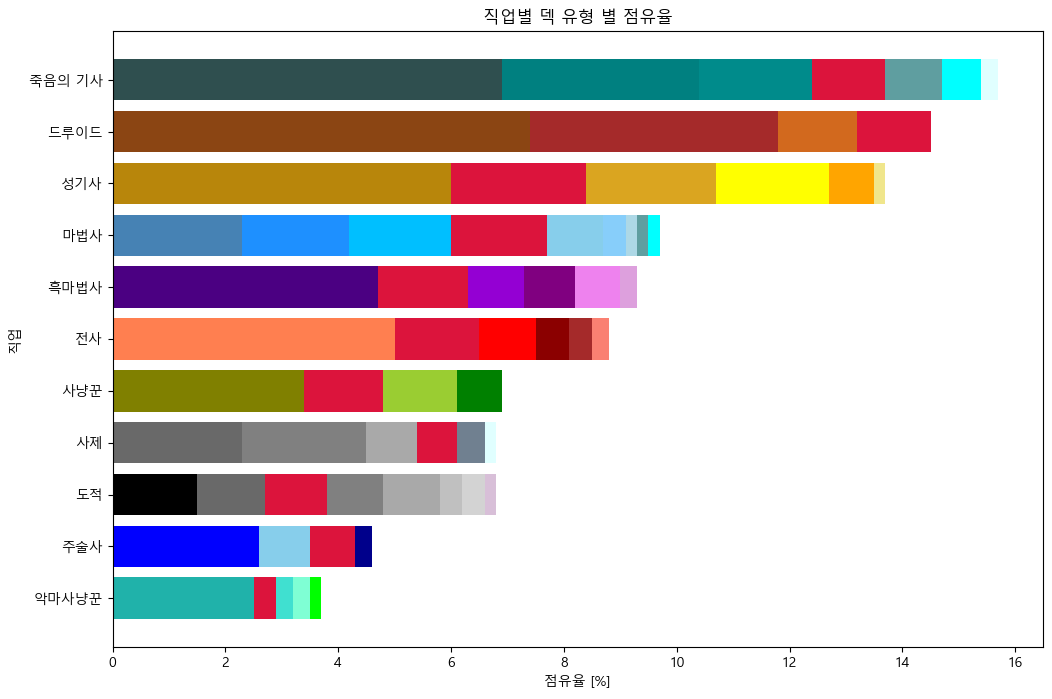

In [285]:
# 직업별로 덱 유형의 점유율을 누적으로 변환
deck_total['Cumulative_Popular'] = deck_total.groupby(['Hero'])['Popular'].cumsum()

# Seaborn을 사용하여 누적 막대 그래프 그리기
plt.figure(figsize=(12, 8))

# 각 덱에 대해 누적 막대 그래프 그리기
for i, deck in enumerate(deck_total['Deck'].unique()):
    plt.barh(
        deck_total[deck_total['Deck'] == deck]['Hero'],
        deck_total[deck_total['Deck'] == deck]['Popular'],
        label=deck,
        color = deck_colors[deck],
        left=deck_total[deck_total['Deck'] == deck]['Cumulative_Popular'] - deck_total[deck_total['Deck'] == deck]['Popular']
    )

plt.title("직업별 덱 유형 별 점유율")
plt.xlabel("점유율 [%]")
plt.ylabel("직업")
plt.legend().set_visible(False)

plt.show()
